Кратко опишите возможный набор классов, которые можно использовать для представления музыкальной коллекции (например, внутри музыкального проигрывателя), сосредоточив внимание на том, как они будут связаны по композиции. Вы должны включить классы для песен, исполнителей, альбомов и плейлистов. Подсказка: запишите четыре имени класса, нарисуйте линию между каждой парой классов, которые, по вашему мнению, должны иметь отношения, и решите, какой вид отношений будет наиболее подходящим.

Для простоты вы можете предположить, что у любой песни или альбома есть одно значение «исполнитель» (которое может представлять более одного человека), но вы должны включать альбомы-сборники (которые содержат песни разных исполнителей). «Исполнитель» сборника может иметь особое значение, например, «Разные исполнители». Вы также можете предположить, что каждая песня связана с одним альбомом, но может существовать несколько копий одной и той же песни (которые включены в разные альбомы).

Напишите простую реализацию этой модели, которая ясно показывает, как составлены различные классы. Напишите пример кода, чтобы показать, как вы будете использовать свои классы для создания альбома и добавления всех его песен в список воспроизведения. Подсказка: если два объекта связаны друг с другом двунаправленно, вам придется решить, как должна формироваться эта связь — один из объектов должен быть создан раньше другого, поэтому вы не можете связать их друг с другом в обоих направлениях. одновременно!


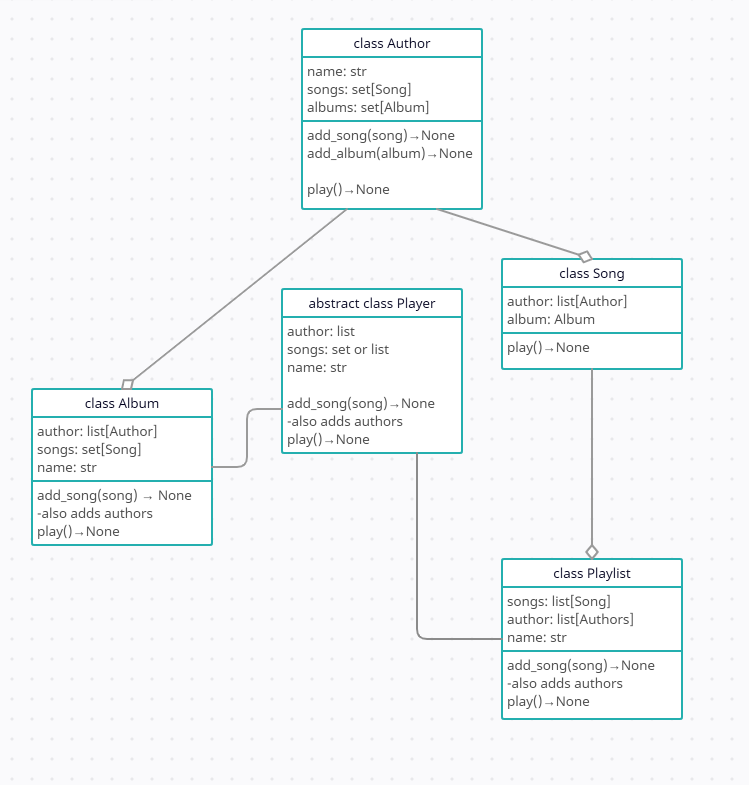

In [6]:
import abc

class Author:
    def __init__(self, name):
        self.name = name
        self.songs = set()
        self.albums = set()
        
    def add_song(self, song: "Song") -> None:
        self.songs.update([song])
        
    def add_album(self, album: "Album") -> None:
        self.albums.update([album])
        
    def play(self) -> None:
        print(f"playing... {self.songs}")

class Song:
    def __init__(self, name:str, author: Author, album: "Album" = None):
        self.author = author
        self.album = album
        self.name = name
        
    def play(self) -> None:
        print(f"playing... {self.name}")

class Player(abc.ABC):
    name: str
    author: [str, list]
    songs: [set, list]
    
    @abc.abstractmethod
    def play(self) -> None:
        ...
        
    @abc.abstractmethod 
    def add_song(self) -> None:
        ...

class Album(Player):
    def __init__(self, name: str, author: list):
        self.name = name
        self.author = author
        self.songs = set()
    
    def play(self) -> None:
        print(f"playing... {self.songs}")
    
    def add_song(self, song: Song) -> None:
        self.songs.update([song])
        if song.author not in self.author:
            self.author.append(song.author)
            
class Playlist(Player):
    def __init__(self, name: str):
        self.name = name
        self.songs = []
        self.author = []
    
    def play(self) -> None:
        print(f"playing... {self.songs}")
        
    def add_song(self, song: Song) -> None:
        if song not in self.songs:
            if song.author not in self.author:
                self.author.append(song.author)
            self.songs.append(song)


my_favourite = Author("Maybe baby")
my_firstnd = Author("Тот самый")

album_1 = Album("Мейбилэнд", [my_favourite])
song_1 = Song("Дакимакура", my_favourite, album_1)
my_favourite.add_song(song_1)
album_1.add_song(song_1)

album_2 = Album("Хит", [my_firstnd])
song_2 = Song("Человек-яйца", my_firstnd, album_2)
my_firstnd.add_song(song_2)

not_favourite = Author("IcePeak")
song_3 = Song("Аскорбинка", [my_favourite, not_favourite])
not_favourite.add_song(song_3)
album_1.add_song(song_3)
album_1.play()

# and other things...

playing... {<__main__.Song object at 0x0000029493C80D90>, <__main__.Song object at 0x000002949212A8B0>}
